# Imports

In [66]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.style as style 
style.use('tableau-colorblind10')

# Functions

In [2]:
def anglewrap(angList):
    # maps an 0 to 360 angle to -180 to +180
    for i in range(len(angList)):
        if (angList[i] > 180):
            angList[i] = angList[i] - 360
    return 

In [3]:

def import_data(name: str, wrap = True, cleanup = True):
    file = name + ".csv"
    pdoa_data = []
    tdoa_data = []
    rx_true_r = []

    dist_meas = []
    twr_count = []
    dist_true_r = []

    with open(file, "r") as f:
        reader = csv.reader(f)
        for i, line in enumerate(reader):
            linetype = int(line[0])
            if (linetype == 0):
                # rx data, featuring pdoa, tdoa and distance
                pdoa_data += [float(line[1])]
                tdoa_data += [int(line[2])]
                rx_true_r += [float(line[3])]
            
            if (linetype == 1):
                dist_meas += [int(line[5])]
                twr_count += [int(line[6])]
                dist_true_r += [float(line[7])]

            if (linetype == 2):
                print("CIR data")
    
    if (wrap):
        # Wrap angles
        anglewrap(rx_true_r)
        anglewrap(dist_true_r)

    if (cleanup):
        # Remove extreme dist outliers:
        dist_keep_indx = [i > 1000 for i in dist_meas]
        dist_meas_filt = []
        dist_r_filt = []
        twr_count_filt = []

        out_num = 0

        for i in range(len(dist_keep_indx)):
            if dist_keep_indx[i] == True:
                dist_meas_filt += [dist_meas[i]]
                dist_r_filt += [dist_true_r[i]]
                twr_count_filt += [twr_count[i]]
            else:
                out_num += 1

        print("Num of outliers: " + str(out_num))
        # Update values
        dist_meas = dist_meas_filt
        dist_true_r = dist_r_filt
        twr_count = twr_count_filt
    
    return (pdoa_data, tdoa_data, rx_true_r, dist_meas, twr_count, dist_true_r)

# Prepare data

In [78]:
rx_true_r = []
pdoa_data = []
dist_true_r = []
dist_meas = []

# List of measurements:
files = ["m1_to_m2_rot2", "new_rot5m", "m4_to_m1_rot", "m5_to_m1_rot"]
log_num = len(files)
for log in files:
    temp_pdoa, _, temp_rx_r, temp_dist, _, temp_dist_r = import_data(log, True, False)
    rx_true_r += [temp_rx_r]
    pdoa_data += [temp_pdoa]
    dist_true_r += [temp_dist_r]
    dist_meas += [temp_dist]

# Plot data

'\nax.figure()\nax.title("distance")\nfor i in range(log_num):\n    plt.scatter(dist_true_r[i], dist_meas[i], s=0.5)\nplt.xlabel("True angle [Degrees]")\nplt.ylabel("Distance [m]")\nplt.grid()\nplt.legend(files)\n'

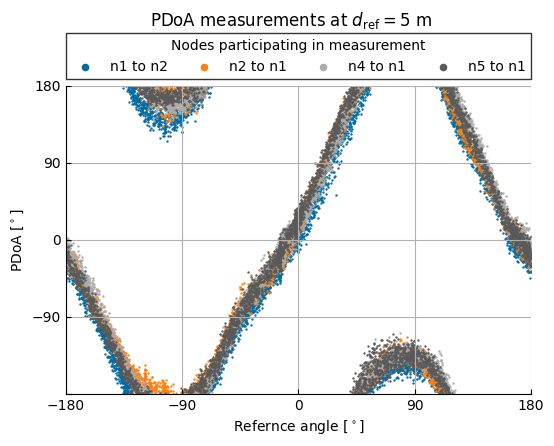

In [83]:
names = ['n1 to n2', 'n2 to n1', 'n4 to n1', 'n5 to n1', '5 m']

fig, ax = plt.subplots(figsize=(6, 4))

for i in range(log_num):
    ax.scatter(rx_true_r[i], np.array(pdoa_data[i])*(180/np.pi), s=0.5, label = names[i])
ax.set_xlabel("Refernce angle [$^\circ$]")
ax.set_ylabel("PDoA [$^\circ$]")
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_yticks([-180, -90, 0, 90, 180])
ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])
ax.tick_params(direction='in')
fig.suptitle('PDoA measurements at $d_\mathrm{ref}=5$ m', y=1.07)
x_ticks = ax.yaxis.get_major_ticks()
x_ticks[0].label1.set_visible(False)
lgnd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=5, mode="expand", borderaxespad=0., scatterpoints=1, fancybox=False, edgecolor='black', title='Nodes participating in measurement')
#lgnd = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=5, mode="expand", borderaxespad=0., scatterpoints=1, fancybox=False, edgecolor='black', title='$d_\mathrm{ref}$')
for handle in lgnd.legend_handles:
    handle.set_sizes([20.0])
plt.savefig("pdoa_vs_aoa2.pdf", format="pdf", bbox_inches="tight")

"""
ax.figure()
ax.title("distance")
for i in range(log_num):
    plt.scatter(dist_true_r[i], dist_meas[i], s=0.5)
plt.xlabel("True angle [Degrees]")
plt.ylabel("Distance [m]")
plt.grid()
plt.legend(files)
"""

# Measurements over time

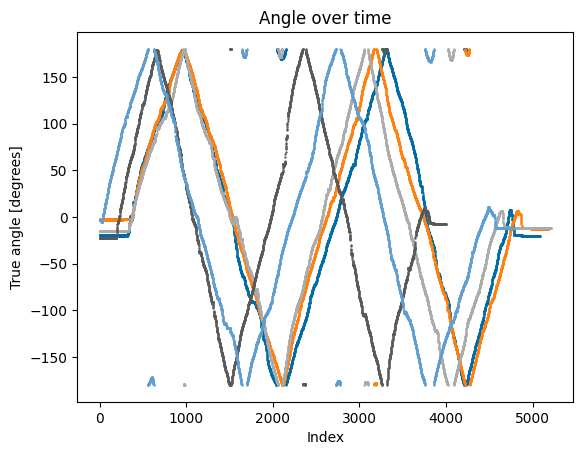

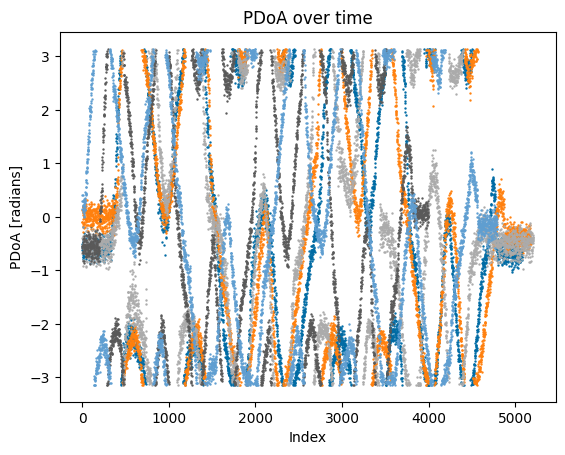

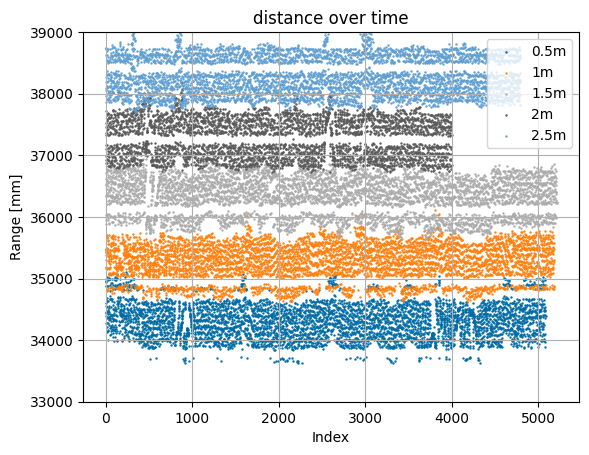

In [67]:
plt.figure()
plt.title("Angle over time")
for i in range(log_num):
    plt.scatter(range(len(rx_true_r[i])), rx_true_r[i], s=0.5)
plt.xlabel("Index")
plt.ylabel("True angle [degrees]")

plt.figure()
plt.title("PDoA over time")
for i in range(log_num):
    plt.scatter(range(len(pdoa_data[i])), pdoa_data[i], s=0.5)
plt.xlabel("Index")
plt.ylabel("PDoA [radians]")

plt.figure()
plt.title("distance over time")
for i in range(log_num):
    plt.scatter(range(len(dist_meas[i])), dist_meas[i], s=0.5)
plt.xlabel("Index")
plt.ylabel("Range [mm]")
plt.ylim([33000, 39000])
plt.legend(['0.5m', '1m', '1.5m', '2m', '2.5m', '3m', '3.5m', '4m', '4.5m', '5m'])
plt.grid()

# Check if encoder goes too fast

(-20.0, 20.0)

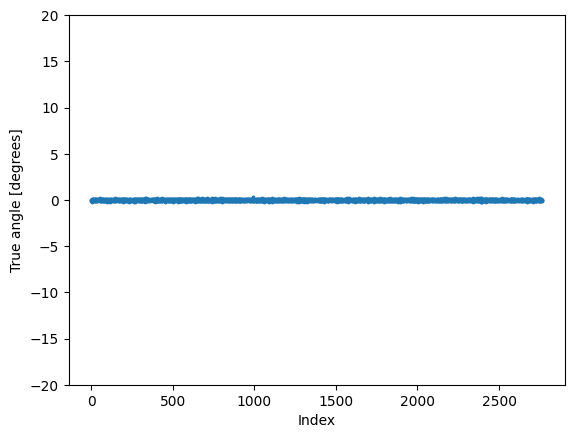

In [14]:
diff_encoder = []

for i in range(len(rx_true_r[0])-1):
    diff_encoder += [rx_true_r[0][i+1]-rx_true_r[0][i]]

plt.figure()
plt.scatter(range(len(diff_encoder)), diff_encoder, s=3.0)
plt.xlabel("Index")
plt.ylabel("True angle [degrees]")
plt.ylim([-20, 20])